# <center> Лабораторная работа 1
## <center> Линейная регрессия - Insurance (Medical Cost Personal Datasets)
### Автор: Стецук Максим 1гр.2п.гр.

In [17]:
# Импорт библиотек
import matplotlib.pyplot as plt
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных import matplotlib.pyplot as plt #для визуализации import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split
import seaborn as sns

In [18]:
# Чтение данных
data = pd.read_csv('../data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# Размеры таблицы
print(data.shape)

(1338, 7)


In [20]:
# Количество пропусков
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1) 

data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [22]:
# Факторы и целевой признак
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

### <center> Task 1

<center> Cоздании выборки для тестирования модели

In [23]:
# Разбиение на тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


### <center> Task 2

<center> Обучение модели линейной регрессии

In [24]:
# Функция для подсчета метрик R^2, MAE, MAPE
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [25]:
# Модель линейной регрессии
linear_reg_model = linear_model.LinearRegression()
linear_reg_model

LinearRegression()

In [26]:
#Обучаем модель - ищем параметры
linear_reg_model.fit(X_train, y_train)

intercept = linear_reg_model.intercept_

#Делаем предсказание для каждой из выборок
y_train_pred = linear_reg_model.predict(X_train)
y_test_pred = linear_reg_model.predict(X_test)

print("Значение свободного члена (intercept) обученной модели:", round(intercept, 2))

Значение свободного члена (intercept) обученной модели: -12390.8


In [27]:
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.888


### <center> Task 3
<center> Boxplot для визуализации ошибок модели линейной регрессии на трени­ровочной и тестовой выборках

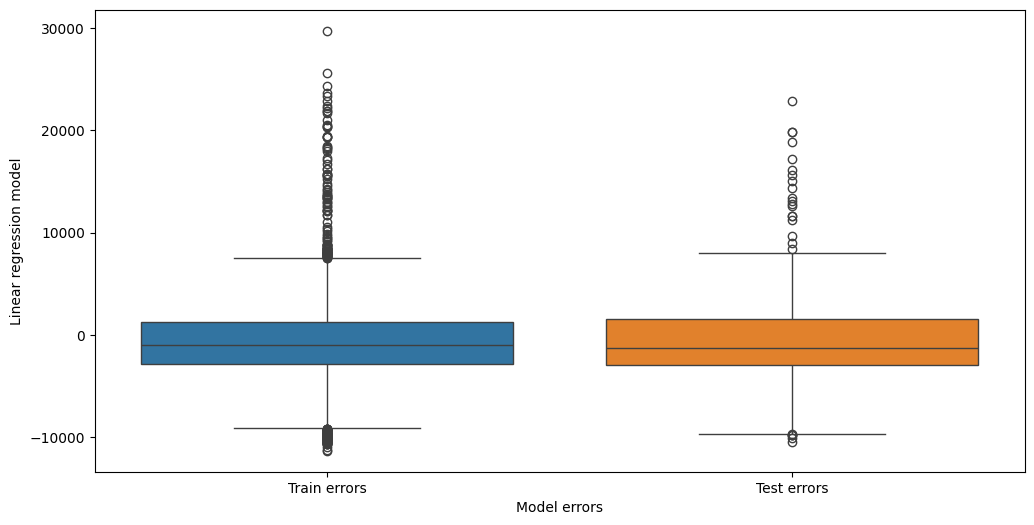

In [28]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Linear regression model'); #название оси ординат

### <center> Task 4

<center> Нормализация тренировочной и тестовой выборки

In [29]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


### <center> Task 5

<center> Обучение модели линейной регрессии на полиномиальных признаках

In [30]:
#создаем логарифмированный целевой признак цены
y_train_log = np.log(y_train)
#Инициализируем объект класса линейная регрессия с L2-регуляризацией (Ridge)
ridge_linear_reg_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_linear_reg_poly.fit(X_train_scaled_poly, y_train_log)

#Делаем предсказание для каждой из выборок
#Берем обратную функцию - экспоненту, тк обучали на логарифме
y_train_pred = np.exp(ridge_linear_reg_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_linear_reg_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.816
Train MAE: 2684.509
Train MAPE: 18.243


Test R^2: 0.857
Test MAE: 2424.021
Test MAPE: 17.912


### <center> Task 6

<center> Значения коэффициентов полученной модели

In [31]:
print("Коэффициенты модели:")
coefficients = ridge_linear_reg_poly.coef_
for i, coef in enumerate(coefficients):
    print(f"Коэффициент для признака x^{i}: {coef}")


Коэффициенты модели:
Коэффициент для признака x^0: 1.6106818022526996
Коэффициент для признака x^1: -0.12546875644160901
Коэффициент для признака x^2: 0.23815977367970853
Коэффициент для признака x^3: 0.7995750337394999
Коэффициент для признака x^4: 0.711720794561989
Коэффициент для признака x^5: 0.04700831063214945
Коэффициент для признака x^6: 0.03243169609112555
Коэффициент для признака x^7: -0.01710076711066014
Коэффициент для признака x^8: -0.06233923961271458
Коэффициент для признака x^9: -0.17903953561636604
Коэффициент для признака x^10: 0.22817373738251648
Коэффициент для признака x^11: 0.008252553775557185
Коэффициент для признака x^12: -0.7169733247435343
Коэффициент для признака x^13: -1.370540788461999
Коэффициент для признака x^14: 0.20746182949998562
Коэффициент для признака x^15: 0.3143326725004897
Коэффициент для признака x^16: 0.5020147973696402
Коэффициент для признака x^17: 0.5868725028825599
Коэффициент для признака x^18: -0.12546875644160851
Коэффициент для призна

### <center> Task 7

<center> Линейная регрессия с L1­ регуляризацией (Lasso)

In [32]:
# Линейная регрессия с L1 ­регуляризацией (Lasso)
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
#Обучаем модель предсказывать логарифм целевого признака
lasso_lr_poly.fit(X_train_scaled_poly, y_train_log)

#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(lasso_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(lasso_lr_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: -0.126
Train MAE: 8293.602
Train MAPE: 96.957


Test R^2: -0.098
Test MAE: 8603.138
Test MAPE: 107.491


Результат указывает на то, что модель неудачно справляется с предсказанием. Отрицательные значения коэффициента детерминации (R^2) и высокие значения средней абсолютной ошибки (MAE) и средней абсолютной процентной ошибки (MAPE) свидетельствуют о том, что модель делает неправильные предсказания.